### Fashion MNIST

#### Since our data is in ubyte format

`` We use the following fuction to read the data and return it as a numpy array``

In [1]:
"""https://gist.github.com/tylerneylon"""
import struct
import numpy as np

def read_idx(filename):

    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)


#### We use the function to extract our training and test dataset

In [2]:
X_train = read_idx("./fashion_mnist/train-images-idx3-ubyte")
y_train = read_idx("./fashion_mnist/train-labels-idx1-ubyte")
X_test = read_idx("./fashion_mnist/t10k-images-idx3-ubyte")
y_test = read_idx("./fashion_mnist/t10k-labels-idx1-ubyte")

`Inspecting our dataset`

In [3]:
print("Initial shape or dimension of X_train", str(X_train.shape))
print("Number of labels in y_test:",(X_test.shape[0]))
print("size  of ytest",y_test.shape)
print("size  of Xtest",X_test.shape)
print("size  of ytrain",y_train.shape)

Initial shape or dimension of X_train (60000, 28, 28)
Number of labels in y_test: 10000
size  of ytest (10000,)
size  of Xtest (10000, 28, 28)
size  of ytrain (60000,)


### Viewing our image

0 AxesImage(54,189.487;98.4706x63.9529)
1 AxesImage(172.165,189.487;98.4706x63.9529)
2 AxesImage(290.329,189.487;98.4706x63.9529)
3 AxesImage(54,112.744;98.4706x63.9529)
4 AxesImage(172.165,112.744;98.4706x63.9529)
5 AxesImage(290.329,112.744;98.4706x63.9529)
6 AxesImage(54,36;98.4706x63.9529)
7 AxesImage(172.165,36;98.4706x63.9529)
8 AxesImage(290.329,36;98.4706x63.9529)


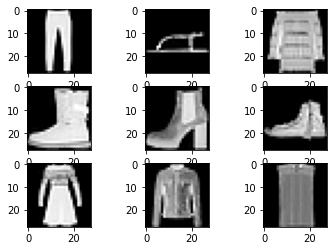

In [4]:
import matplotlib.pyplot as plt
import random

for i in range(9):
    plt.subplot(330 +1 +i)
    random_num = random.randint(0,len(X_train))
    print(i,plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray')))


### Creatinng our model

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

# Training Parameters
batch_size = 128
epochs = 10

# Lets store the number of rows and columns
img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]



X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10


# `Model Creation`

In [6]:
# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [7]:
#Training our model
history = model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,
                    verbose=1,validation_data = (X_test,y_test))

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
469/469 [==============================] - 36s 57ms/step - loss: 3.1273 - accuracy: 0.1615 - val_loss: 1.5942 - val_accuracy: 0.4998
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 1.7041 - accuracy: 0.4545 - val_loss: 0.8674 - val_accuracy: 0.7096
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 1.3076 - accuracy: 0.5810 - val_loss: 0.7459 - val_accuracy: 0.7463
Epoch 4/10
469/469 [==============================] - 11s 25ms/step - loss: 1.0945 - accuracy: 0.6467 - val_loss: 0.6810 - val_accuracy: 0.7624
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 1.0000 - accuracy: 0.6769 - val_loss: 0.6398 - val_accuracy: 0.7761
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.9134 - accuracy: 0.7026 - val_loss: 0.6082 - val_accuracy: 0.7848
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.8710 - accuracy: 0.7153 - val_loss: 0.5859 - val_accuracy:

In [8]:
model.save("Fashion_Classifiers.h5")

### Let's test our model

In [8]:
from keras.models import load_model
model = load_model("Fashion_Classifiers.h5")

import cv2
import numpy as np

def getLabel(input_class):
    number = int(input_class)
    if number == 0:
        return "T-shirt/top"
    if number ==1:
        return "Trouser"
    if number == 2:
        return "Pullover"
    if number == 3:
        return "Dress"
    if number == 4:
        return "Coat"
    if number == 5:
        return "Sandal"
    if number == 6:
        return "Shirt"
    if number == 7:
        return "Sneaker"
    if number == 8:
        return "Bag"
    if number == 9:
        return "Ankle boot"
    
def draw_test(name,pred,actual,input_im):
    BLACK = [0,0,0]
    
    res = getLabel(pred)
    actual = getLabel(actual)

    expanded_image = cv2.copyMakeBorder(input_im,0,0,0,4*imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    
    cv2.putText(expanded_image, "Predicted - " + str(res), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,0), 1)
    cv2.putText(expanded_image, "   Actual - " + str(actual), (152, 90) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,0,255), 1)
    cv2.imshow(name, expanded_image)

    

for i in range(10):
    rand = random.randint(0,len(X_test))
    input_im = X_test[rand]
    actual = y_test[rand].argmax(axis=0)
    imageL = cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    #Get prediction
    res = str(model.predict_classes(input_im,1,verbose = 0)[0])
    
    draw_test("prediction",res,actual,imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()


In [ ]:
!git add Fashion_classifiers.ipynb Fashion_Classifiers.h5
!git commit -m "21:14/03-05-2021"
!git  push origin main